### 5.2.2. 有监督学习示例：简单线性回归

让我们来演示一个简单线性回归的建模步骤——最常见的任务就是为散点数据集(x, y) 拟合一条直线。
<br>我们将使用下面的样本数据来演示这个回归示例（如图5-14 所示）：

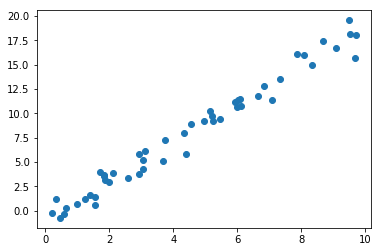

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# ?plt.style()

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

In [2]:
from sklearn.linear_model import LinearRegression

有了数据，就可以将前面介绍的步骤付诸实现了，先一步步来。

**(1) 选择模型类**
在Scikit-Learn 中，每个模型类都是一个Python 类。因此，假如我们想要计算一个简单线性回归模型，那么可以直接导入线性回归模型类：
```python
In[6]: from sklearn.linear_model import LinearRegression
```
除了简单线性模型，常用的线性模型还有许多，具体内容请参考[sklearn.linear_model模块文档](http://scikitlearn.org/stable/modules/linear_model.html)。

**(2) 选择模型超参数**
请注意，模型类与模型实例不同。
<br>当我们选择了模型类之后，还有许多参数需要配置。根据不同模型的不同情况，你可能需要回答以下问题。
* 我们想要拟合偏移量（即直线的截距）吗？
* 我们需要对模型进行归一化处理吗？
* 我们需要对特征进行预处理以提高模型灵活性吗？
* 我们打算在模型中使用哪种正则化类型？
* 我们打算使用多少模型组件1 ？

有一些重要的参数必须在选择模型类时确定好。这些参数通常被称为超参数，即在模型拟合数据之前必须被确定的参数。在Scikit-Learn 中，我们通常在模型初始化阶段选择超参数。

对于现在这个线性回归示例来说，可以实例化`LinearRegression` 类并用`fit_intercept`超参数设置是否想要拟合直线的截距：

In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。我们还没有将模型应用到数据上：Scikit-Learn 的API 对选择模型和将模型应用到数据区别得很清晰。

**(3) 将数据整理成特征矩阵和目标数组**
<br>前面介绍了Scikit-Learn 的数据表示方法，它需要二维特征矩阵和一维目标数组。虽然我们的目标数组已经有了y（长度为n_samples 的数组），但还需要将数据x 整理成[n_samples,n_features] 的形式。在这个示例中，可以对一维数组进行简单的维度变换：

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

**(4) 用模型拟合数据**
<br>现在就可以将模型应用到数据上了，这一步通过模型的fit() 方法即可完成：

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

`fit()`命令会在模型内部进行大量运算，运算结果将存储在模型属性中，供用户使用。
<br>在Scikit-Learn中，所有通过`fit()`方法获得的模型参数都带一条下划线。
<br>例如，在线性回归模型中，模型参数如下所示：

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311164

这两个参数分别表示对样本数据拟合直线的斜率和截距。与前面样本数据的定义（斜率2、截距-1）进行比对，发现拟合结果与样本非常接近。

模型参数的不确定性是机器学习经常遇到的问题。一般情况下，Scikit-Learn 不会为用户提供直接从模型参数获得结论的工具；与其将模型参数解释为机器学习问题，不如说它更像统计建模问题。机器学习的重点并不是模型的预见性。如果你想要对模型拟合参数的意义和其他相关参数分析工具有更深入的理解，请参考[StatsModels Python 程序包](http://statsmodels.sourceforge.net/)。

**(5) 预测新数据的标签**
<br>模型训练出来之后，有监督机器学习的主要任务就变成了对不属于训练集的新数据进行预测。在Scikit-Learn 中，我们用predict() 方法进行预测。“新数据”是特征矩阵的x坐标值，我们需要用模型预测出目标数组的y 轴坐标：

In [14]:
xfit = np.linspace(-1, 11)

首先，将这些x值转换成[n_samples, n_features] 的特征矩阵形式，之后将其输入到模型中：

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

最后，把原始数据和拟合结果都可视化出来（如图5-15 所示）：

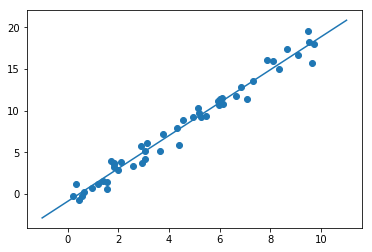

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

通常都是用一些基准指标来验证模型的学习效果，我们将在下面的示例中介绍这些指标。